**About Yulu**

Yulu, India's premier micro-mobility service provider, offers innovative transportation solutions for daily commutes. Initially conceived to alleviate traffic congestion in India, Yulu now delivers the safest commuting experience through its intuitive mobile app, facilitating shared, solo, and sustainable travel.

Yulu strategically positions its zones in key locations such as metro stations, bus stands, residential areas, and corporate offices, ensuring seamless, cost-effective, and convenient first and last-mile connectivity.

Facing recent revenue downturns, Yulu has engaged a consulting firm to analyze the determinants of demand for shared electric cycles in the Indian market. Their aim is to comprehend the factors influencing the uptake of these eco-friendly transportation options.

**The company seeks to ascertain:**
1. Which variables hold significance in forecasting the demand for shared electric cycles in the Indian market?
2. How effectively these variables explain the variations in electric cycle demand.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [ ]:
df=pd.read_csv('/content/yulu_data.csv.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Features:**

1. datetime: This column represents the date and time when the data was recorded. It is of datetime data type.

2. season: This column categorizes the seasons into four categories: spring, summer, fall, and winter. Each season is represented by a numerical code (1 for spring, 2 for summer, 3 for fall, and 4 for winter).

3. holiday: This column indicates whether the day is a holiday or not. It is a binary variable where 1 represents a holiday and 0 represents a non-holiday.

4. workingday: This column indicates whether the day is a working day or not. It is a binary variable where 1 represents a working day (neither weekend nor holiday) and 0 represents a non-working day (weekend or holiday).

5. weather: This column describes the weather conditions on the day of recording. It has four categories represented by numerical codes:
   - 1: Clear, Few clouds, partly cloudy, partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

6. temp: This column represents the temperature in Celsius at the time of recording.

7. atemp: This column represents the "feeling" temperature in Celsius at the time of recording.

8. humidity: This column represents the humidity level at the time of recording.

9. windspeed: This column represents the wind speed at the time of recording.

10. casual: This column represents the count of casual users of rental bikes at the time of recording.

11. registered: This column represents the count of registered users of rental bikes at the time of recording.

12. count: This column represents the total count of rental bikes, including both casual and registered users, at the time of recording.

By profiling these columns, we can identify patterns, distributions, and potential relationships within the dataset, which can help in understanding the factors influencing the demand for shared electric cycles in the Indian market.

In [ ]:
np.any(df.isna())

False

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#Converting the datatype of datetime column from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])


In [ ]:
df['datetime'].min()


Timestamp('2011-01-01 00:00:00')

In [ ]:
df['datetime'].max()


Timestamp('2012-12-19 23:00:00')

In [ ]:
df['datetime'].max() - df['datetime'].min()


Timedelta('718 days 23:00:00')

In [ ]:
df['day'] = df['datetime'].dt.day_name()


In [ ]:
# setting the 'datetime' column as the index of the DataFrame 'df'
df.set_index('datetime', inplace = True)

**Slicing Data**

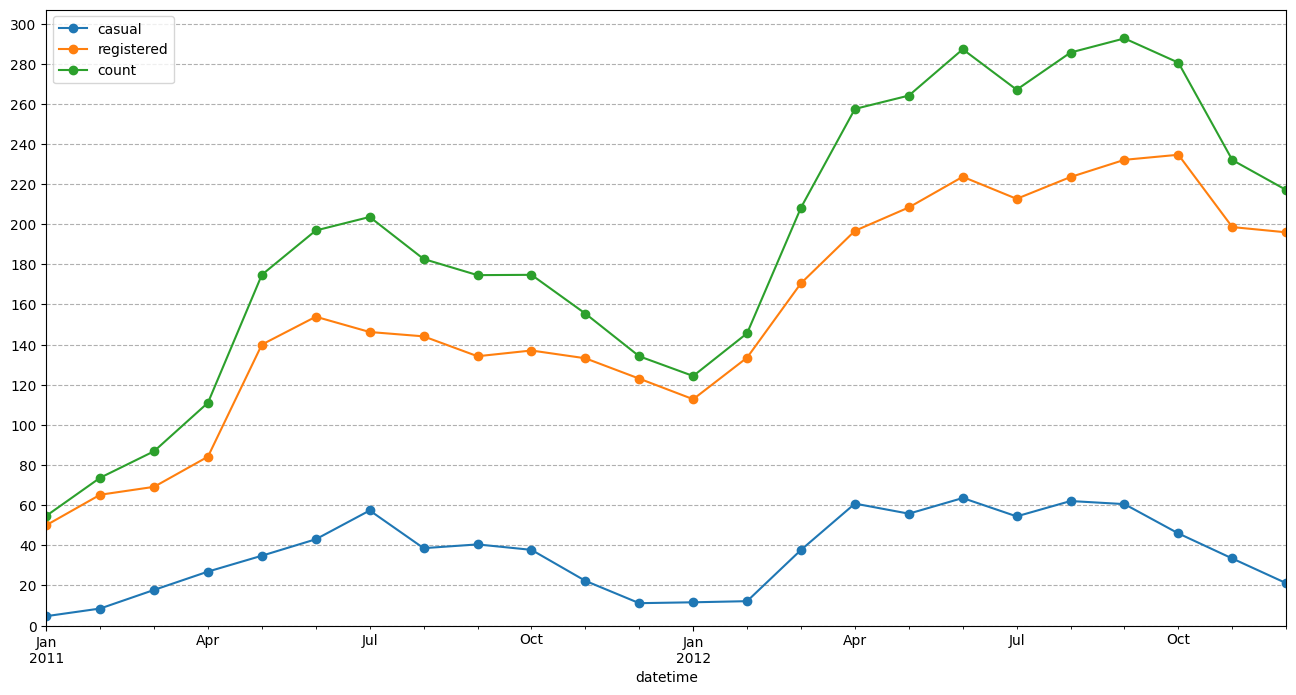

In [ ]:
plt.figure(figsize=(16, 8))
# Plotting a line plot by resampling the data monthly and calculating the average values for 'casual', 'registered', and 'count' users.
df.resample('M')['casual'].mean().plot(kind='line', legend='casual', marker='o')
df.resample('M')['registered'].mean().plot(kind='line', legend='registered', marker='o')
df.resample('M')['count'].mean().plot(kind='line', legend='count', marker='o')
plt.grid(axis='y', linestyle='--')  # Adding dashed gridlines along the y-axis.
plt.yticks(np.arange(0, 301, 20))  # Setting y-axis ticks from 0 to 300 with an interval of 20.
plt.ylim(0,)  # Setting the lower limit of the y-axis to 0.
plt.show()  # Displaying the plot.


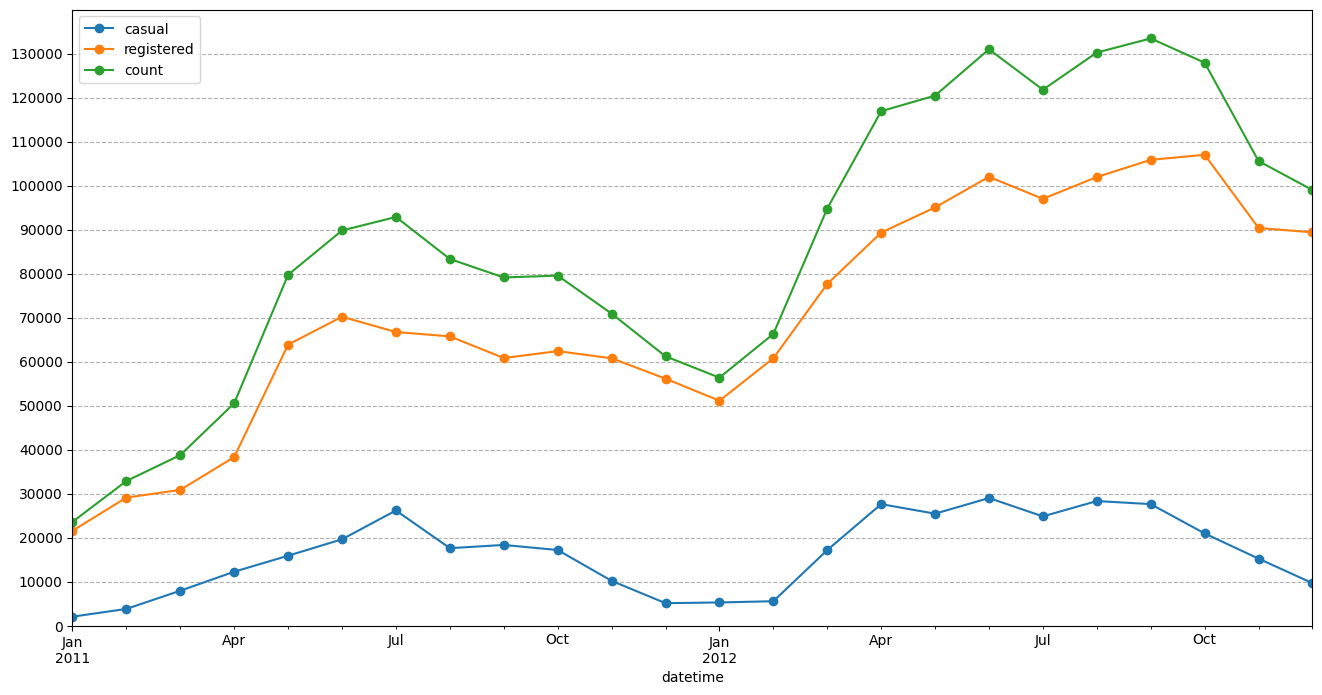

In [ ]:
plt.figure(figsize=(16, 8))
# Plotting a line plot by resampling the data monthly and calculating the total sum of 'casual', 'registered', and 'count' users for each month.
df.resample('M')['casual'].sum().plot(kind='line', legend='casual', marker='o')
df.resample('M')['registered'].sum().plot(kind='line', legend='registered', marker='o')
df.resample('M')['count'].sum().plot(kind='line', legend='count', marker='o')
plt.grid(axis='y', linestyle='--')  # Adding dashed gridlines along the y-axis.
plt.yticks(np.arange(0, 130001, 10000))  # Setting y-axis ticks from 0 to 130,000 with an interval of 10,000.
plt.ylim(0,)  # Setting the lower limit of the y-axis to 0.
plt.show()  # Displaying the plot.


In [ ]:
# Resampling the DataFrame by the year
df_yearly = df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up
# to compare the previous year's count with the current year's count
df_yearly['prev_count'] = df_yearly['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of the previous year
df_yearly['growth_percent'] = (df_yearly['count'] - df_yearly['prev_count']) * 100 / df_yearly['prev_count']

df_yearly


,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


This data indicates a significant increase in the count of rental bikes over the span of one year. The average total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. This reflects a substantial annual growth rate of 65.41% in the demand for electric vehicles on an hourly basis. Such growth suggests a positive trend and potentially signifies a successful outcome or rising demand for the variable under consideration.

In [ ]:
df.reset_index(inplace = True)

In [ ]:
# Grouping the DataFrame by the month
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)
# Create a new column 'prev_count' by shifting the 'count' column one position up
 # to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1)
# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


The rental bike count demonstrates an upward trend from January to March, marked by a notable growth rate of 34.70% between February and March.
This growth stabilizes from April to June, characterized by relatively modest increases.
However, from July to September, a slight decline in rental bike counts is observed, accompanied by negative growth rates.
Subsequently, from October to December, the count experiences a further decrease, with the most significant drop occurring between October and November (-14.94%).

[]

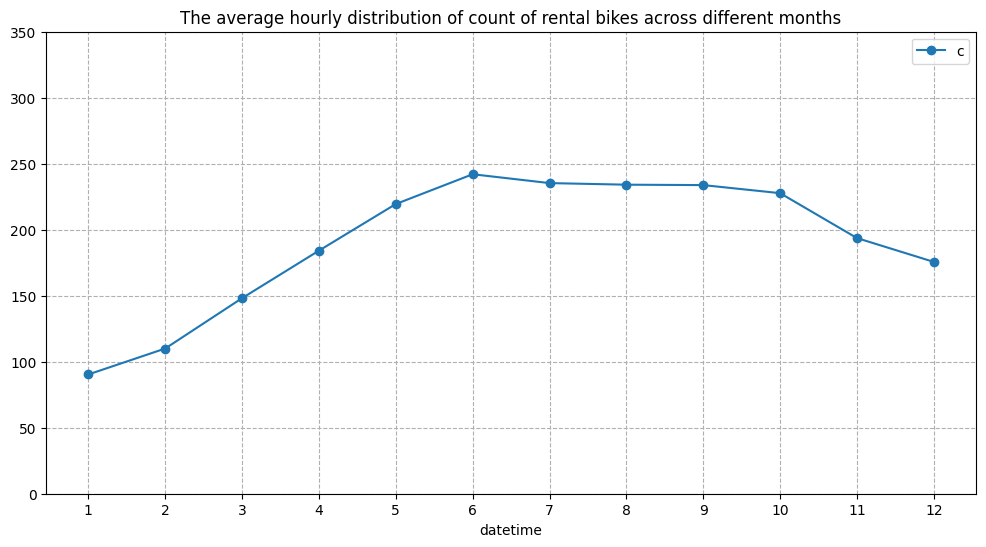

In [ ]:
# Setting the figure size for the plot
plt.figure(figsize = (12, 6))
# Setting the title for the plot
plt.title("The average hourly distribution of count of rental bikes across different months")
# Grouping the DataFrame by the month and calculating the mean of the 'count' column for each month.
 # Ploting the line graph using markers ('o') to represent the average count per month.
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,) # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13)) # Setting the x-ticks to represent the months from 1 to 12
plt.legend('count') # Adding a legend to the plot for the 'count' line.
plt.yticks(np.arange(0, 400, 50))
# Adding gridlines to both the x and y axes with a dashed line style
plt.grid(axis = 'both', linestyle = '--')
plt.plot() # Displaing the plot.

The data indicates that the average hourly count of rental bikes peaks in June, with July and August following closely behind.
Conversely, the lowest average hourly counts occur in January, with February and March also showing lower counts.
Overall, these observations reveal a seasonal pattern in rental bike demand, with heightened usage during spring and summer, a slight dip in autumn, and a further decline in winter. Understanding these patterns can aid the rental bike company in resource allocation, devising marketing strategies, and operational planning year-round.

In [ ]:
# Grouping the DataFrame by the hour
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)
# Create a new column 'prev_count' by shifting the 'count' column one position up
 # to compare the previous hour's count with the current hour's count
df1['prev_count'] = df1['count'].shift(1)
# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1


,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


During the early morning hours (hours 0 to 5), there's a notable decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.
However, starting from hour 5, there's a sudden uptick in count, marked by a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
This upward trend continues significantly until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.
Subsequently, after hour 17, there's a gradual decline in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

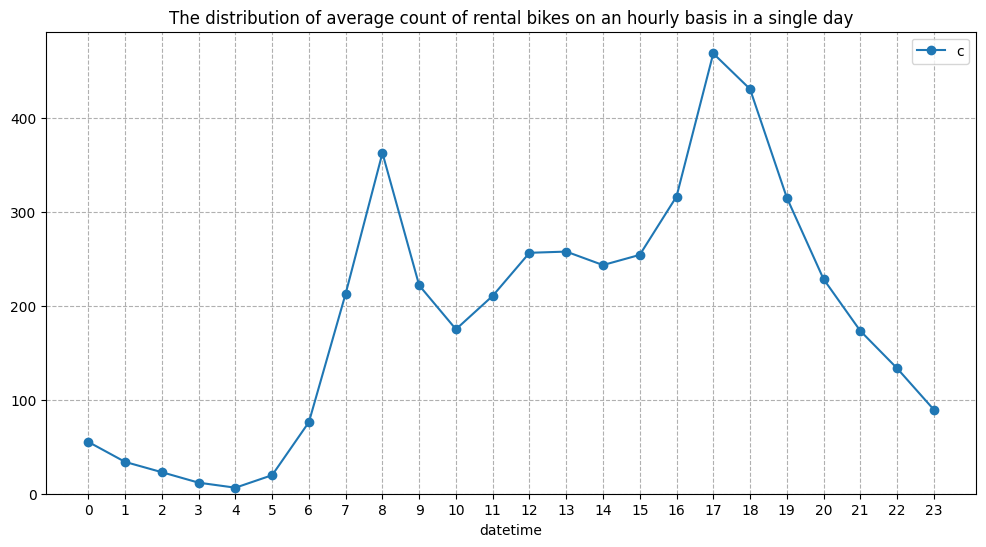

In [ ]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

The data reveals that the average count of rental bikes peaks at 5 PM, closely followed by 6 PM and 8 AM.
Conversely, the lowest average counts occur at 4 AM, followed by 3 AM and 5 AM.
These patterns highlight distinct fluctuations in counts throughout the day, characterized by low counts during the early morning hours, a sudden rise in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

season
4    25.11
2    25.11
3    25.11
1    24.67
Name: proportion, dtype: float64

In [ ]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

holiday
0    97.14
1     2.86
Name: proportion, dtype: float64

In [ ]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

workingday
1    68.09
0    31.91
Name: proportion, dtype: float64

In [ ]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

Univariate analysis

[]

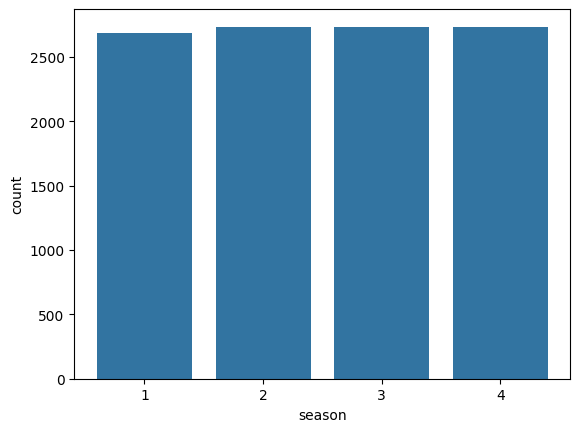

In [ ]:
sns.countplot(data = df, x = 'season')
plt.plot()

[]

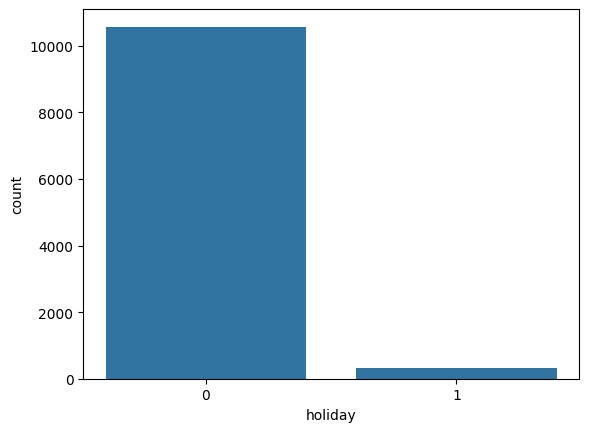

In [ ]:
sns.countplot(data = df, x = 'holiday')
plt.plot()

[]

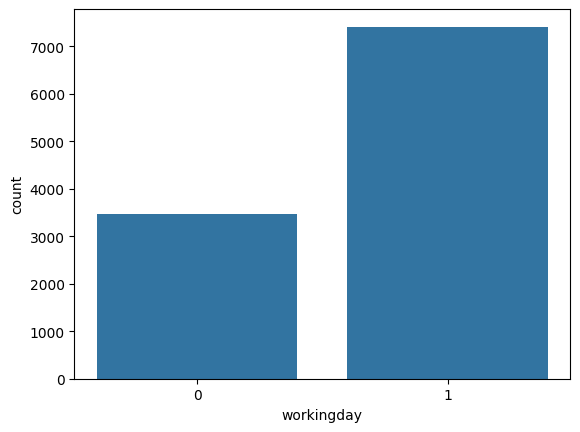

In [ ]:
sns.countplot(data = df, x = 'workingday')
plt.plot()

[]

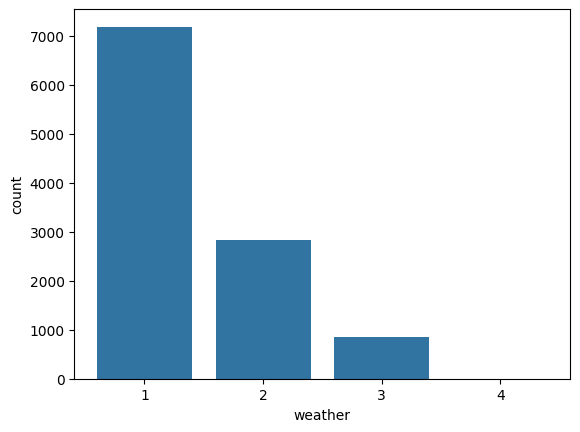

In [ ]:
sns.countplot(data = df, x = 'weather')
plt.plot()

[]

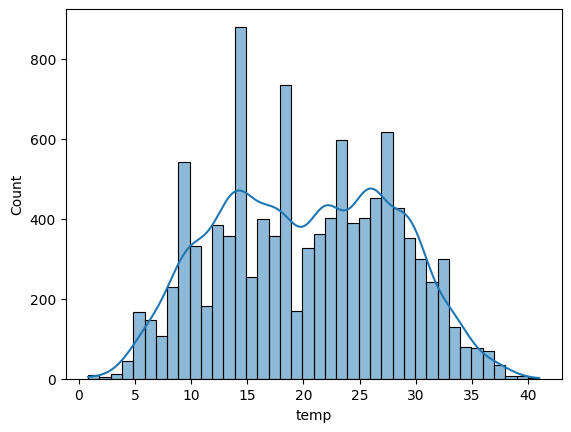

In [ ]:
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()

In [ ]:

temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

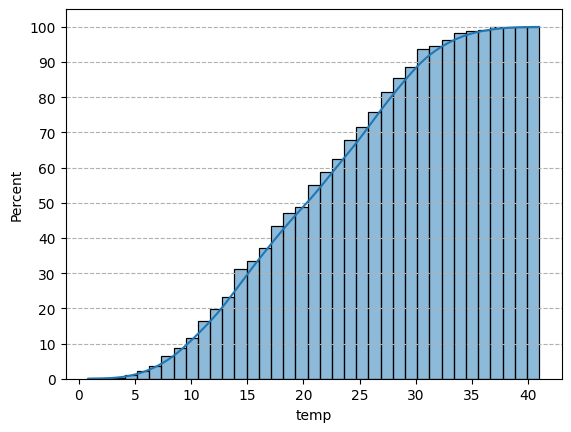

In [ ]:
sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()

More than 80 % of the time, the temperature is less than 28 degrees celcius.


[]

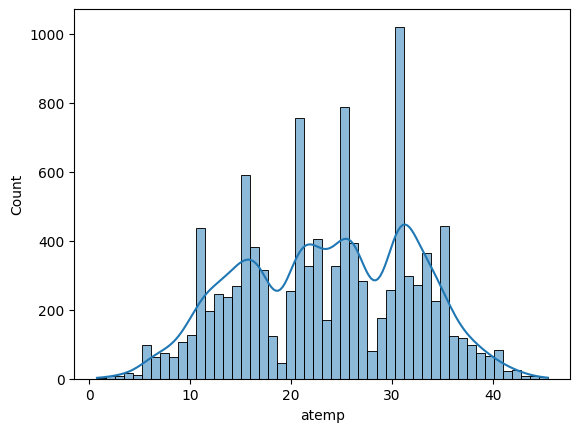

In [ ]:
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()

In [ ]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.


[]

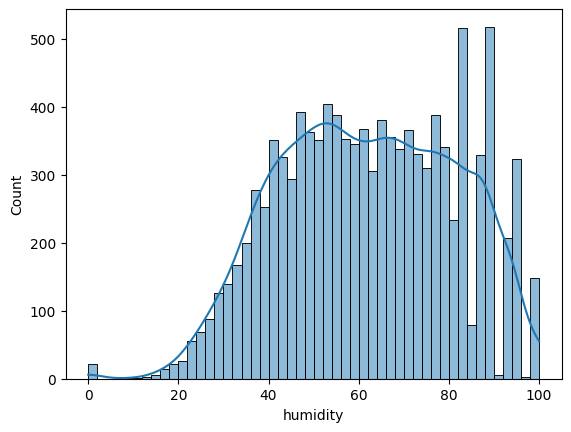

In [ ]:
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()

In [ ]:

humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std


(61.89, 19.25)

The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.


[]

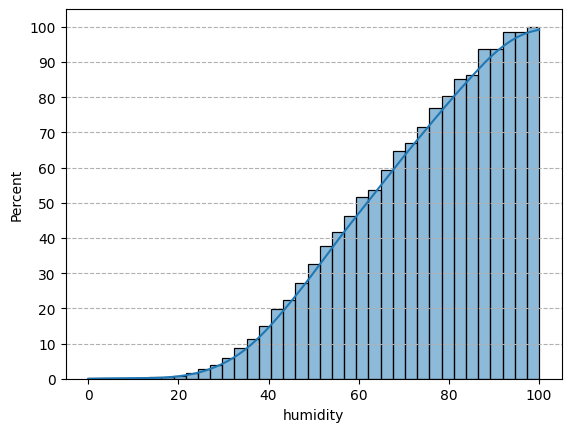

In [ ]:
sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--') # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()

More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.


[]

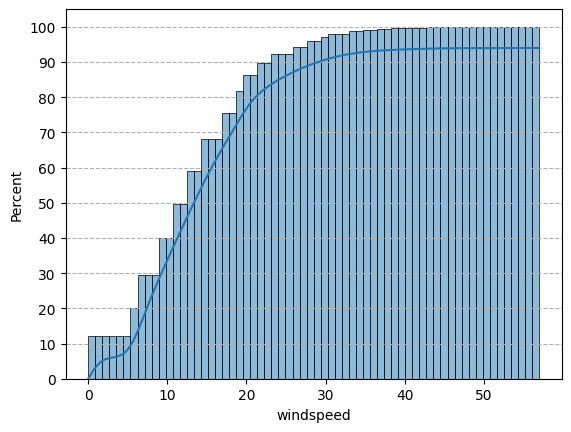

In [ ]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()

More than 85 % of the total windspeed data has a value of less than 20.


[]

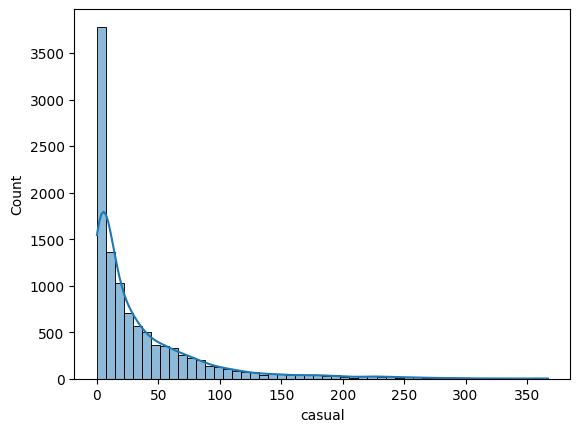

In [ ]:
sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()

[]

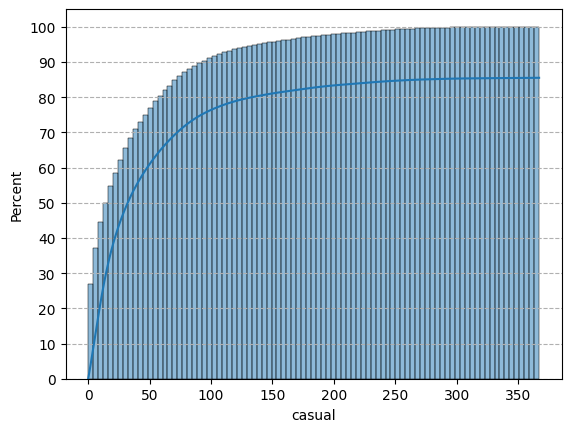

In [ ]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()

More than 80 % of the time, the count of casual users is less than 60.


[]

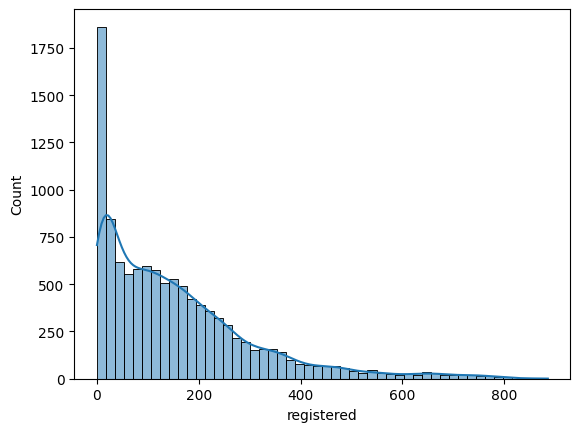

In [ ]:
sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()

[]

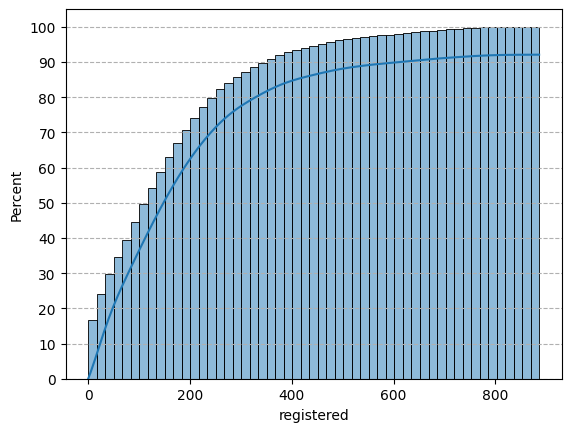

In [ ]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()

More than 85 % of the time, the count of registered users is less than 300.


**Outlier detection**

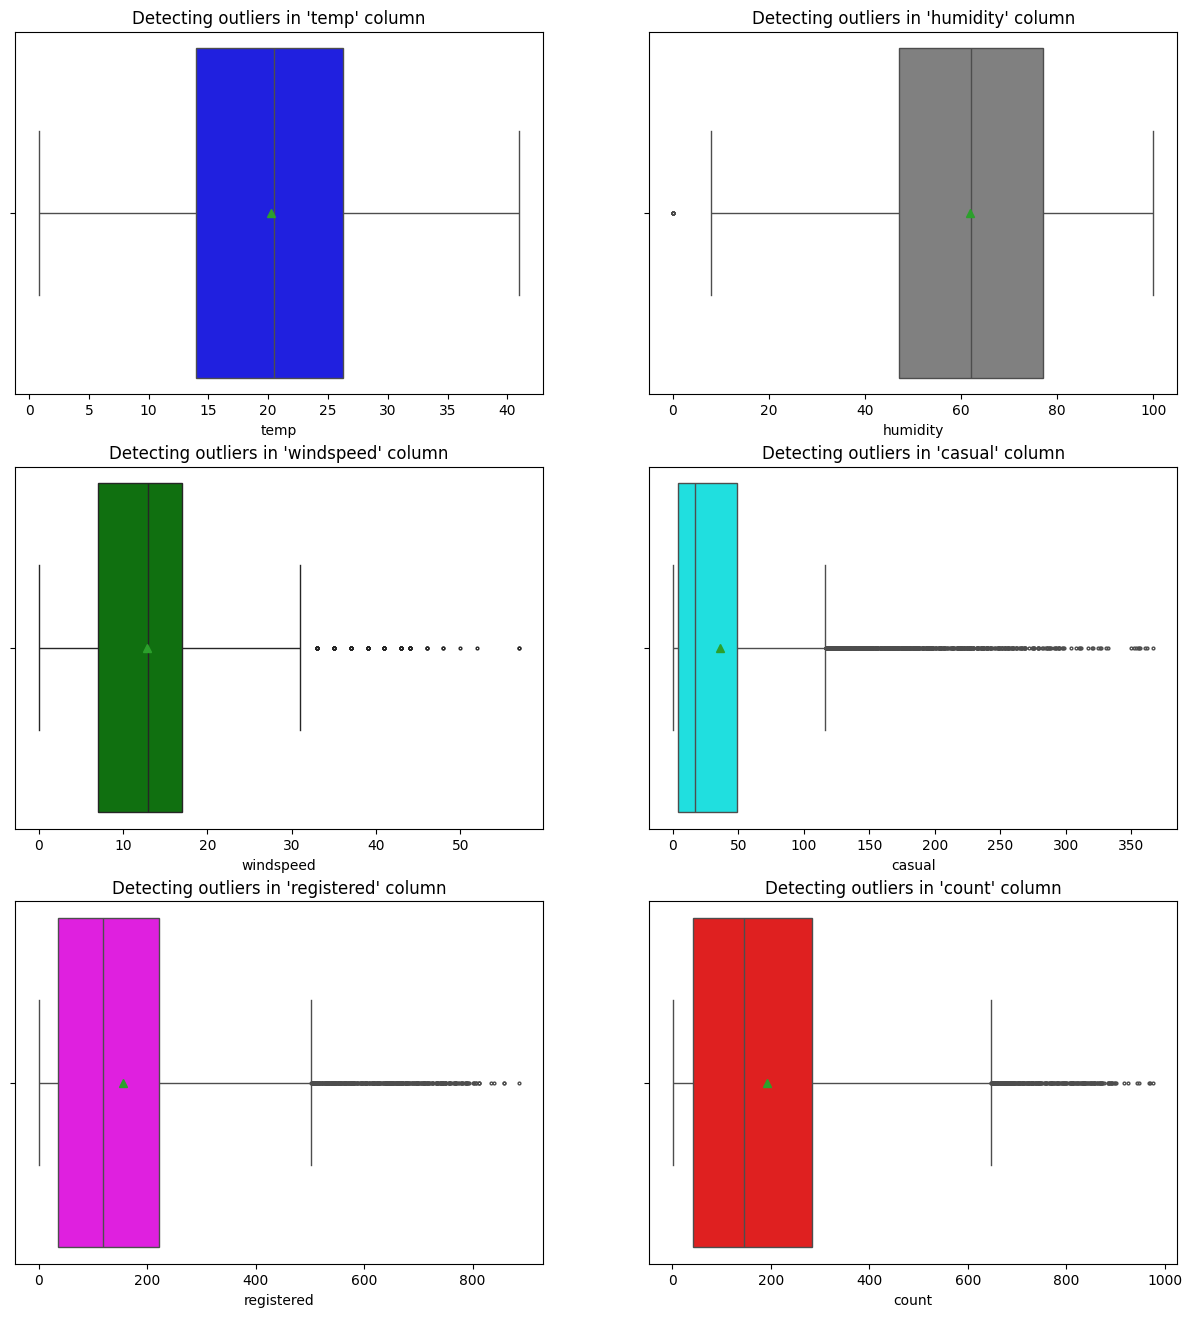

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
 plt.subplot(3, 2, count)
 plt.title(f"Detecting outliers in '{i}' column")
 sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
 plt.plot()
 count += 1

1. There is no outlier in the temp column.
2. There are few outliers present in humidity column.
3. There are many outliers present in each of the columns : windspeed, casual, registered, count.

**Bi-variate analysis**

[]

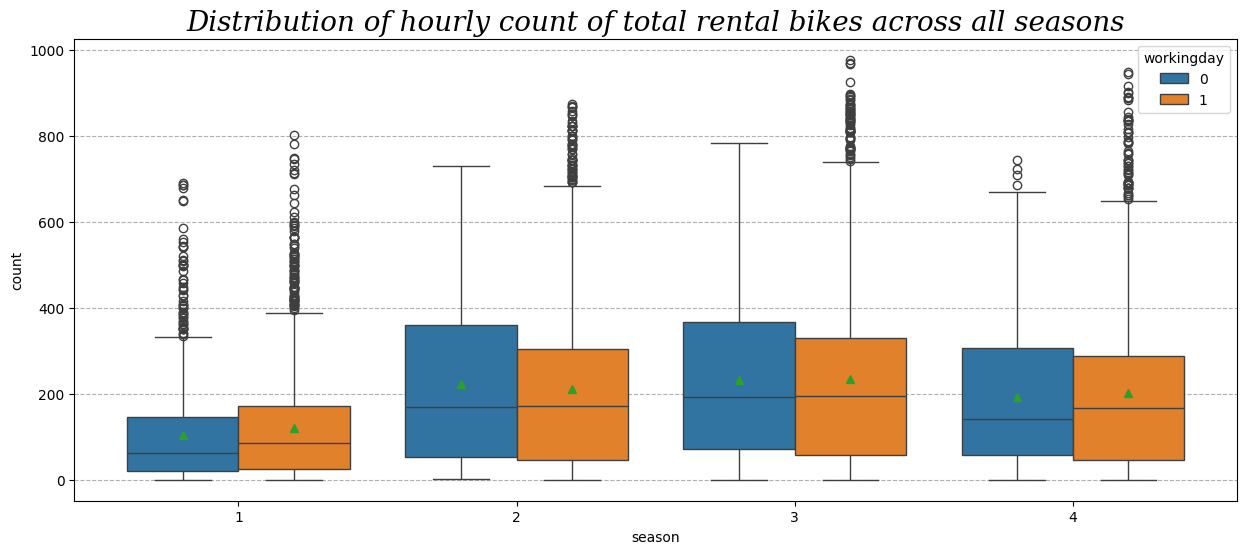

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
 fontdict = {'size' : 20,
 'style' : 'oblique',
 'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.


1) Does the presence of a Working Day have any impact on the rental count of electric cycles?

In [ ]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

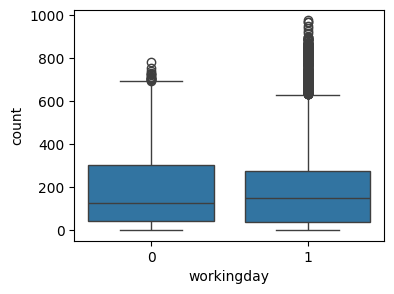

In [ ]:
plt.figure(figsize = (4, 3))
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

**Null Hypothesis (H0)**: The presence of a Working Day has no effect on the number of electric cycles rented. <br>
**Alternative Hypothesis (HA)**: The presence of a Working Day has an effect on the number of electric cycles rented.

We set our alpha to be 0.05

1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0


[]

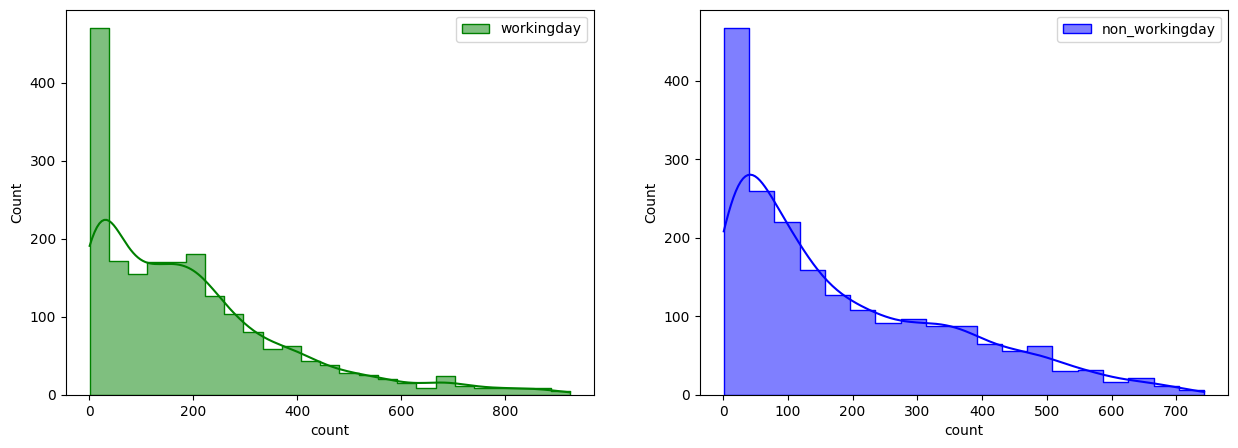

In [ ]:
#to check if data follows the normal distribution

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
 element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
 element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.


In [ ]:
#Applying Shapiro-Wilk test for normality

test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')


p-value 2.730098230260554e-37
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 3.2373142402773534e-36
The sample does not follow normal distribution


Homogeneity of Variances using Lavene's test


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance
test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
 df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
 print('The samples do not have Homogenous Variance')
else:
 print('The samples have Homogenous Variance ')


p-value 0.6401193458103986
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.


In [ ]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples
test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
 df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
 print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
 print('Mean no.of electric cycles rented is same for working and non-working days')


P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .


2) Does the occurrence of holidays influence the number of electric cycles rented?

In [ ]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

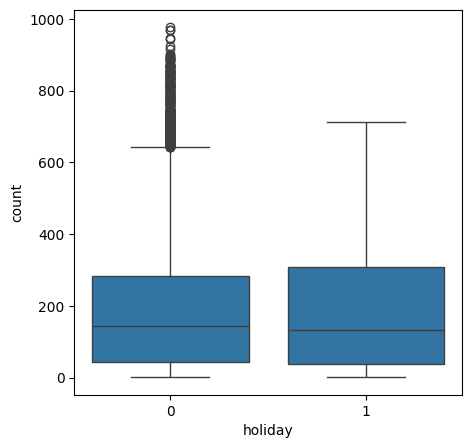

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

**Null Hypothesis (H0)**: The presence of holidays does not impact the number of electric cycles rented. <br>
**Alternative Hypothesis (HA)**: The presence of holidays affects the number of electric cycles rented.

In [ ]:
#Shapiro-Wilk test for normality

test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 8.620690966631983e-11
The sample does not follow normal distribution


In [ ]:

test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 4.3206174857486623e-13
The sample does not follow normal distribution


In [ ]:
#Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance
test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
 df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
 print('The samples do not have Homogenous Variance')
else:
 print('The samples have Homogenous Variance ')


p-value 0.9877417140477485
The samples have Homogenous Variance 


In [ ]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples
test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
 df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
 print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
 print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.9962042562746104
No.of electric cycles rented is similar for holidays and non-holidays


Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.


3) Does the season influence weather conditions?

In [ ]:
df[['weather', 'season']].describe()

,weather,season
count,10886.000000,10886.000000
mean,1.418427,2.506614
std,0.633839,1.116174
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,4.000000,4.000000


It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.


**Null Hypothesis (H0)**: There is no association between weather and season.<br>
**Alternative Hypothesis (HA)**: There is an association between weather and season.

In [ ]:
cross_table = pd.crosstab(index = df['season'],
 columns = df['weather'],
 values = df['count'],
 aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.


In [ ]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)


Test Statistic = 11769.559450959445
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[2.21180553e+05 7.59953534e+04 1.52975188e+04 2.45745681e+01]
 [4.16375587e+05 1.43062351e+05 2.87978002e+04 4.62619795e+01]
 [4.53449224e+05 1.55800469e+05 3.13619255e+04 5.03810967e+01]
 [3.85057636e+05 1.32301826e+05 2.66317555e+04 4.27823557e+01]]


In [ ]:
#Assume signifance level = 5%
alpha = 0.05
if p_value < alpha:
 print('Reject Null Hypothesis')
else:
 print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.


4) Do different weather conditions result in similar or different rental counts of cycles?

In [ ]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

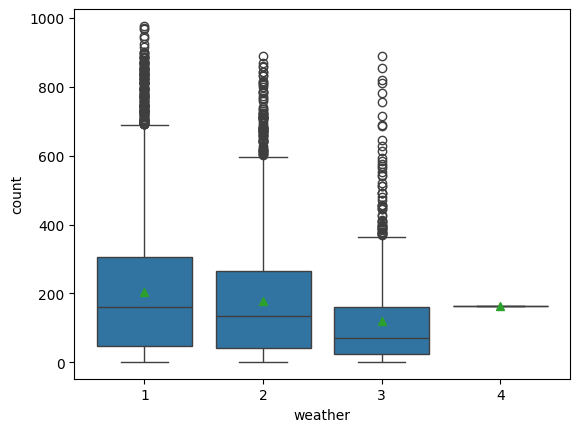

In [ ]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()


In [ ]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

**Null Hypothesis (H0)**: The mean of cycles rented per hour is the same for weather categories 1, 2, and 3.<br>
**Alternative Hypothesis (HA)**: The mean of cycles rented per hour differs among weather categories 1, 2, and 3.

In [ ]:
# Shapiro-Wilk test for normality
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
  print('The sample does not follow normal distribution')
else:
  print('The sample follows normal distribution')

p-value 1.560617259875727e-18
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
  print('The sample does not follow normal distribution')
else:
  print('The sample follows normal distribution')

p-value 7.941969924226288e-19
The sample does not follow normal distribution


In [ ]:
est_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
  print('The sample does not follow normal distribution')
else:
  print('The sample follows normal distribution')


p-value 4.678564238881924e-26
The sample does not follow normal distribution


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance
test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
 df_weather2.loc[:, 'count'].sample(500),
 df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
 print('The samples do not have Homogenous Variance')
else:
 print('The samples have Homogenous Variance ')

p-value 7.159051522579103e-11
The samples do not have Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent
samples

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', test_stat)
print('p value =', p_value)


Test Statistic = [1.36471292e+01 1.83091584e+00 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02
 7.08445555e+01]
p value = [1.08783632e-03 4.00333264e-01 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45
 4.13333147e-16]


In [ ]:
#Assume signifance level = 5%
alpha = 0.05
if p_value.all() < alpha:
 print('Reject Null Hypothesis')
else:
 print('Failed to reject Null Hypothesis')


Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different weathers.


[]

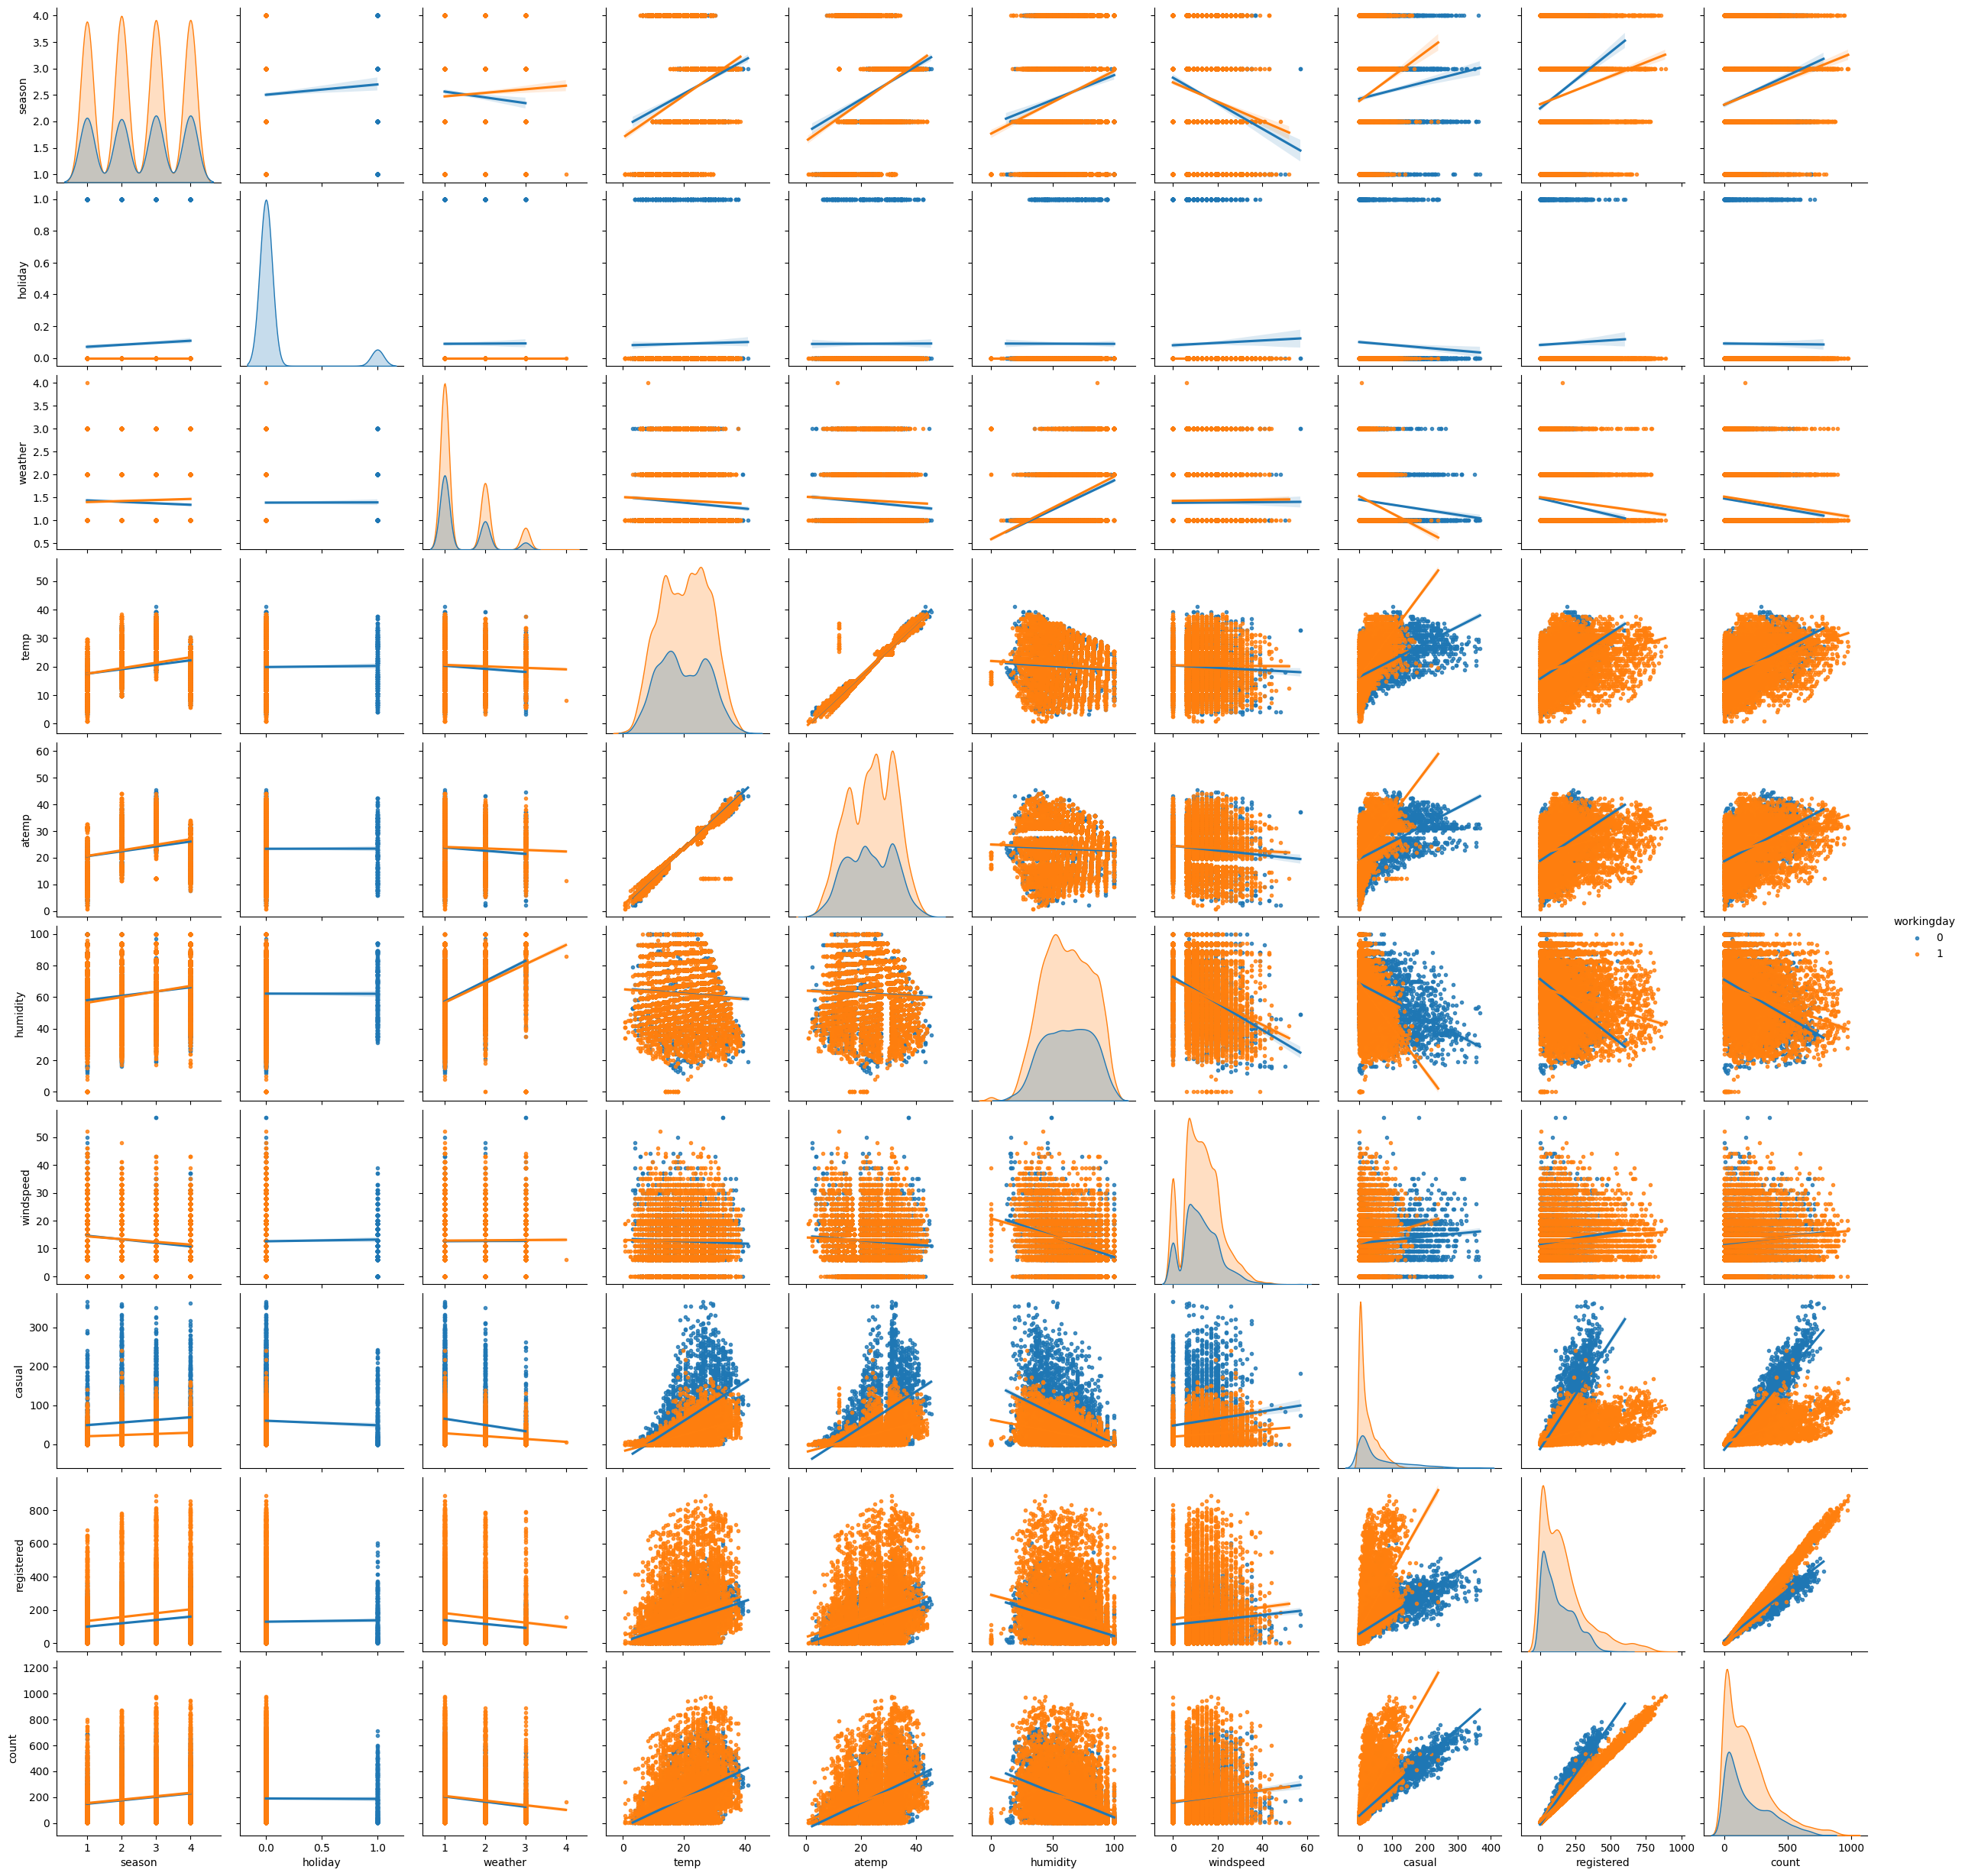

In [ ]:
sns.pairplot(data = df,
 kind = 'reg',
 hue = 'workingday',
 markers = '.')
plt.plot()


**Observations**

1. The dataset spans from January 1, 2011, to December 19, 2012, covering a duration of 718 days and 23 hours.
2. Among every 100 users, approximately 19 are classified as casual users, with the remaining 81 being registered users.
3. The average total hourly bike rental count is 144 for the year 2011 and 239 for the year 2012, indicating an impressive annual growth rate of 65.41% in the demand for electric bikes on an hourly basis.
4. A distinct seasonal pattern emerges, with heightened demand during the spring and summer months, followed by a mild decline in the fall and a more pronounced drop in the winter.
5. Notably, the lowest average hourly bike rental counts occur in January, closely followed by February and March.
6. A clear diurnal fluctuation is observed, featuring reduced counts during the early morning hours, a sharp increase in the morning, peak usage during the afternoon, and a gradual decline in the evening and nighttime.
7. It's noteworthy that over 80% of the recorded time periods experience temperatures below 28 degrees Celsius
8. Moreover, humidity levels exceed 40% for more than 80% of the recorded instances, indicating that humidity levels mainly fluctuate between the optimal range and overly moist conditions.
9. Additionally, over 85% of the dataset's windspeed measurements fall below 20, suggesting generally moderate wind conditions.
Regarding weather conditions, the highest hourly bike rental counts are observed during clear and cloudy weather, followed by misty conditions and rainy weather. Records for extreme weather conditions are notably scarce.

**Summary of Hypothesis:**

1)Is there any effect of Working Day on the number of electric cycles rented ?<br>
->The mean hourly count of the total rental bikes is statistically similar for both working and non-working days.
2)Is there any effect of holidays on the number of electric cycles rented ?<br>
->There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
3)Is weather dependent on the season ?<br>
->The hourly total number of rental bikes is statistically different for different weathers.
4)Is the number of cycles rented is similar or different in different weather ?<br>
->There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
